## algorithm design and anlysis-2025 spring  homework 3
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

请证明基于比较的排序算法计算复杂度下界为$\Omega(nlogn)$

想法：使用决策树的方式来证明基于比较的排序算法的下界为$\Omega(nlogn)$。  
为了分析基于比较的排序算法的下界，我们可以将任何基于比较的排序算法表示为一个决策树。每个节点代表一次比较操作，树的每条路径代表一种可能的比较结果，最终的叶节点代表排序后的结果  
对于一个含有n个元素的输入序列，排序的所有可能结果有n!种。这些结果形成了决策树的叶节点，每条路径代表一个排序过程。  
决策树的深度对于算法进行比较的次数，为了排序这些n个元素，决策树的叶节点的数量为$n!$，因此树的深度至少需要$\log_2(n!)$次比较

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：
![图片描述](hw3_img/hw3_01.jpg)

## 问题 2 

构建二叉搜索树

> 1. 给定一个数组 [48, 33, 49, 47, 42, 46, 32], 构建一个二叉搜索树存储这些数据，请**绘制**所构建的**二叉搜索树**（标明结点的值）。
> 2. 从第1问的二叉搜索树中删除33，请**绘制**删除33后的**二叉搜索树**（标明结点的值）

- 推荐使用graphviz包绘制树的结构

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer：


In [11]:
import os
os.environ["PATH"] += os.pathsep + r"E:\tools\Graphviz\bin"
from graphviz import Digraph

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# 二叉搜索树插入
def insert(root, value):
    if root is None:
        return TreeNode(value)
    if value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

# 创建树并插入元素
def build_bst(arr):
    root = None
    for value in arr:
        root = insert(root, value)
    return root

# 可视化树的函数
def visualize_tree(root):
    dot = Digraph()
    
    def add_nodes_edges(node):
        if node:
            dot.node(str(node.value), str(node.value))
            if node.left:
                dot.edge(str(node.value), str(node.left.value))
                add_nodes_edges(node.left)
            if node.right:
                dot.edge(str(node.value), str(node.right.value))
                add_nodes_edges(node.right)
    
    add_nodes_edges(root)
    return dot

# 删除节点的函数
def delete_node(root, key):
    if root is None:
        return root
    if key < root.value:
        root.left = delete_node(root.left, key)
    elif key > root.value:
        root.right = delete_node(root.right, key)
    else:
        # 节点只有一个子节点或没有子节点
        if root.left is None:
            temp = root.right
            root = None
            return temp
        elif root.right is None:
            temp = root.left
            root = None
            return temp
        # 节点有两个子节点，找到右子树的最小值节点
        temp = find_min(root.right)
        root.value = temp.value
        root.right = delete_node(root.right, temp.value)
    return root

# 找到树中的最小值节点
def find_min(node):
    current = node
    while current.left is not None:
        current = current.left
    return current

# 输入数组并构建树
arr = [48, 33, 49, 47, 42, 46, 32]
root = build_bst(arr)

# 可视化原始树
dot_original = visualize_tree(root)
dot_original.render('hw3_img/bst_original', format='png', view=True)

# 删除33并可视化
root_after_deletion = delete_node(root, 33)
dot_after_deletion = visualize_tree(root_after_deletion)
dot_after_deletion.render('hw3_img/bst_after_deletion', format='png', view=True)

'hw3_img\\bst_after_deletion.png'

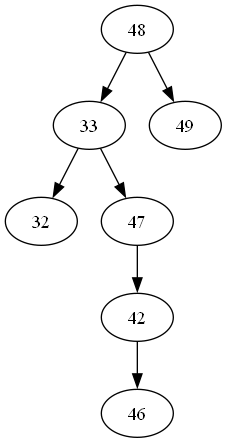

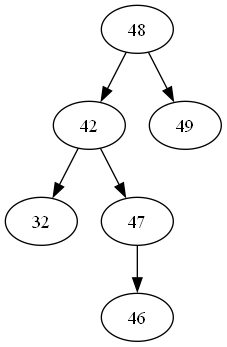

In [18]:
from IPython.display import Image, display
display(Image(filename='hw3_img/bst_original.png'))
display(Image(filename='hw3_img/bst_after_deletion.png'))

## 问题 3 

> 下面是九门课程的开始和结束时间:
>
> [(9:00,12:30), (11:00,14:00), (13:00, 14:30), (9:00,10:30),(13:00, 14:30),(14:00,16:30), (15:00,16:30), (15:00,16:30), (9:00,10:30)]
>
> 请使用贪婪算法为这九门课分配教室，要求在同一天内安排这些课，并且每个教室同一时间只能安排一门课。

**请问最少需要几间教室，罗列出每个教室安排的课程**

我们用 贪婪 + 最小堆（优先队列） 来解决这个问题：  
首先按课程的开始时间排序。然后用一个最小堆（优先队列）来跟踪每个教室的结束时间。  
其次遍历课程列表：如果当前课程的开始时间 ≥ 某个教室的结束时间，就复用这个教室；否则，新建一个教室。

In [19]:
import heapq

# 原始时间列表（转为分钟方便处理）
courses = [
    ("9:00", "12:30"), ("11:00", "14:00"), ("13:00", "14:30"),
    ("9:00", "10:30"), ("13:00", "14:30"), ("14:00", "16:30"),
    ("15:00", "16:30"), ("15:00", "16:30"), ("9:00", "10:30")
]

# 时间字符串转为分钟
def time_to_minutes(t):
    h, m = map(int, t.split(":"))
    return h * 60 + m

# 转换并排序
intervals = [(time_to_minutes(s), time_to_minutes(e)) for s, e in courses]
intervals.sort(key=lambda x: x[0])  # 按开始时间排序

# 最小堆维护教室（每个元素是 (结束时间, 教室编号)）
room_heap = []  # heap of (end_time, room_id)
room_assignments = []  # 存储每门课程的教室编号
room_counter = 0

for interval in intervals:
    start, end = interval
    assigned = False
    # 尝试复用已有教室
    for i in range(len(room_heap)):
        if room_heap[i][0] <= start:
            end_time, room_id = heapq.heappop(room_heap)
            heapq.heappush(room_heap, (end, room_id))
            room_assignments.append((interval, room_id))
            assigned = True
            break
    if not assigned:
        # 新开一个教室
        room_counter += 1
        heapq.heappush(room_heap, (end, room_counter))
        room_assignments.append((interval, room_counter))

# 输出结果
print(f"需要的最少教室数: {room_counter}")
for (start, end), room_id in room_assignments:
    print(f"课程 {start//60}:{start%60:02d} - {end//60}:{end%60:02d} 分配到 教室 {room_id}")


需要的最少教室数: 3
课程 9:00 - 12:30 分配到 教室 1
课程 9:00 - 10:30 分配到 教室 2
课程 9:00 - 10:30 分配到 教室 3
课程 11:00 - 14:00 分配到 教室 2
课程 13:00 - 14:30 分配到 教室 3
课程 13:00 - 14:30 分配到 教室 1
课程 14:00 - 16:30 分配到 教室 2
课程 15:00 - 16:30 分配到 教室 1
课程 15:00 - 16:30 分配到 教室 3


## 问题 4 

> 爬楼梯问题：假设爬楼梯时你每次只能爬一阶或者爬两阶，问爬上n阶的楼梯，你一共有多少种方法

请设计算法完成该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：爬楼梯问题本质上是一个动态规划问题，可以用斐波那契数列来表示  
爬 1 阶：只有 1 种方法（1）
爬 2 阶：有 2 种方法（1+1, 2）
爬 3 阶：有 3 种方法（1+1+1, 1+2,2+1）  
我们设 dp[i] 表示爬到第 i 阶的方法数，那么状态转移方程是：

dp[i] = dp[i-1] + dp[i-2]
意思是：要到第 i 阶，可以从 i-1 阶爬 1 步，也可以从 i-2 阶爬 2 步。


In [25]:
# add your code here
def climb_stairs(n):
    if n <= 2:
        return n
    dp = [0] * (n + 1)
    dp[1], dp[2] = 1, 2
    for i in range(3, n + 1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]
m = 3
n = 5
print(climb_stairs(m))
print(climb_stairs(n))

# your algorithm time complexity is: O(n)

3
8


## 问题 5 

> 0-1背包问题：现在有4块大理石，每个大理石对应的重量和价值使用一个元组表示, 即（重量，价值），4块大理石的重量和价值为：[(5,10), (4,40), (6,30), (3, 50)], 假设你有一辆最大承重为9的小推车，请问使用这个小推车装大理石的最大价值为多少

请设计一个算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：这是一个典型的 0-1 背包问题，解决该问题的思路可以使用 动态规划  
不明白具体应该怎么做，借助AI顺了一下思路  
![图片描述](hw3_img/hw3_05.png)

In [26]:
# add your code here
def knapsack(weights, values, capacity):
    n = len(weights)
    # dp[i][j]表示前i个物品，容量为j时的最大价值
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, capacity + 1):
            if weights[i - 1] <= j:
                # 如果当前物品的重量不超过背包容量，可以选择放或不放
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - weights[i - 1]] + values[i - 1])
            else:
                # 当前物品放不下，不能选择放
                dp[i][j] = dp[i - 1][j]

    return dp[n][capacity]

# 物品重量与价值
weights = [5, 4, 6, 3]
values = [10, 40, 30, 50]
capacity = 9

# 计算最大价值
max_value = knapsack(weights, values, capacity)
print(f"使用最大承重为 {capacity} 的小推车装大理石的最大价值为: {max_value}")
# your algorithm time complexity is:
# 时间复杂度：O(n * W)，其中 n 是大理石数量，W 是背包容量（最大承重）。

# 空间复杂度：O(n * W)，即我们需要保存一个大小为 (n+1) * (W+1) 的二维数组

使用最大承重为 9 的小推车装大理石的最大价值为: 90


## 问题 6 
给定 `n` 个非负整数表示每个宽度为 `1` 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。



<div style="text-align:center;width:800px;"> <img alt="" src="./fig/hw3q6.png"> </div>

请分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：  
这道题上课的时候老师讲过，可以用双指针算法，但是具体怎么做还是不太明白，借助AI顺了一下思路  
![图片描述](hw3_img/hw3_06.png)

In [28]:
# add your code here
def trap(height):
    n = len(height)
    if n == 0:
        return 0
    
    left = 0
    right = n - 1
    left_max = right_max = 0
    res = 0
    
    while left <= right:
        if height[left] <= height[right]:
            if height[left] >= left_max:
                left_max = height[left]
            else:
                res += left_max - height[left]
            left += 1
        else:
            if height[right] >= right_max:
                right_max = height[right]
            else:
                res += right_max - height[right]
            right -= 1
    
    return res
height1 = [0,1,0,2,1,0,1,3,2,1,2,1]
print(trap(height1))
height2 = [4,2,0,3,2,5]
print(trap(height2))
# your algorithm time complexity is:
# your algorithm time complexity is:

6
9


## 问题 7 

**股票投资组合优化**： 假设你是一位投资者，想要在不同的股票中分配你的资金，以最大化你的投资回报。每只股票都有不同的预期收益率和风险。你的目标是选择一些股票，使得总投资金额不超过你的预算，并且预期收益最大化。

在这个情况下，你可以将每只股票视为一个“物品”，其重量为投资金额，价值为预期收益率。然后，你可以使用分级背包问题的方法来选择部分股票，以便在预算内获得最大的预期收益。

以下是一个简化的例子：

假设你有以下三只股票可供选择：

1. 股票 A：投资金额 5000 美元，预期收益率 10%
2. 股票 B：投资金额 3000 美元，预期收益率 8%
3. 股票 C：投资金额 2000 美元，预期收益率 12%

请设计算法找到最优投资方案，分析算法设计思路，计算时间复杂度，并基于python编程实现

idea：  
我们可以使用动态规划来求解这个问题，定义一个状态 dp[i]，表示在预算为 i 的情况下，最大化的收益率。

初始条件：dp[0] = 0，即如果没有预算，收益率为 0。

递推公式：对于每只股票，我们有两种选择：

不选择这只股票，那么当前的最大收益率不变，即 dp[i] = dp[i]。

选择这只股票，那么当前的最大收益率变为 dp[i - weight] + value，其中 weight 是股票的投资金额，value 是股票的预期收益率。

通过迭代所有股票和预算值，最终 dp[budget] 就是最优投资方案的最大预期收益率

In [ ]:
# add your code here
def maxProfit(stocks, budget):
    n = len(stocks)
    dp = [0] * (budget + 1)  # dp[i] 表示预算为 i 时的最大收益

    # 遍历每只股票
    for i in range(n):
        investment, return_rate = stocks[i]
        
        # 从后往前遍历，防止重复计算
        for b in range(budget, investment - 1, -1):
            dp[b] = max(dp[b], dp[b - investment] + return_rate)
    
    return dp[budget]

# 股票数据 (投资金额, 预期收益率)
stocks = [
    (5000, 0.10),  # 股票 A
    (3000, 0.08),  # 股票 B
    (2000, 0.12)   # 股票 C
]

budget = 8000  # 预算 8000 美元

# 计算最大预期收益
print(f"最大预期收益: {maxProfit(stocks, budget):.2f}")
# your algorithm time complexity is: 
# 时间复杂度：O(n * W)，其中 n 是股票数量，W 是预算（最大承重）。
# 空间复杂度：O(W)，即我们需要保存一个大小为 (W+1) 的数组

## 问题 8

给你二叉搜索树的根节点 root ，该树中的恰好两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。设计算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

<div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入：root = [1,3,null,null,2]， 输出为：[3,1,null,null,2]， 

解释：3 不能是 1 的左孩子，因为 3 > 1 。交换 1 和 3 使二叉搜索树有效。

2.

 <div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入： root=[3,1,4,null,null,2]， 输出为：[2,1,4,null,null,3]

解释：2 不能在 3 的右子树中，因为 2 < 3 。交换 2 和 3 使二叉搜索树有效。

idea：  
算法设计思路:中序遍历二叉搜索树会生成一个升序序列。如果两个节点被交换，这个序列会出现两个地方的顺序错误。
检测错误点：在中序遍历过程中，找到两个节点，使得它们的值不符合升序。
交换值：找到这两个节点后，交换它们的值。
算法步骤
中序遍历：遍历树，记录节点的值。
检测错误：在遍历过程中，找到两个不符合升序的节点。
交换值：交换这两个节点的值


In [37]:
# add your code here
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def recoverTree(root):
    # 1. 中序遍历时保存遍历的节点值
    first, second, prev = None, None, TreeNode(float('-inf'))  # prev初始化为负无穷

    # 2. 中序遍历函数
    def inorder(node):
        nonlocal first, second, prev
        if not node:
            return
        inorder(node.left)  # 遍历左子树
        
        # 发现违反递增性质的节点
        if not first and prev.val > node.val:
            first = prev  # 第一个错误的节点
        if first and prev.val > node.val:
            second = node  # 第二个错误的节点
            
        prev = node  # 更新prev为当前节点
        
        inorder(node.right)  # 遍历右子树

    inorder(root)  # 调用中序遍历

    # 3. 交换这两个节点的值
    if first and second:
        first.val, second.val = second.val, first.val

# 测试代码
def print_inorder(root):
    if root:
        print_inorder(root.left)
        print(root.val, end=" ")
        print_inorder(root.right)

# 创建一个示例二叉搜索树 root = [1,3,null,null,2]
root = TreeNode(1)
root.left = TreeNode(3)
root.left.right = TreeNode(2)

# 恢复树
recoverTree(root)

# 输出恢复后的树
print_inorder(root)  # 应该输出 1 2 3，验证是否恢复成功
# your algorithm time complexity is: O(n)

1 2 3 

## 问题 9  

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。每条从根节点到叶节点的路径都代表一个数字：

> 例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。

设计一个算法计算从根节点到叶节点生成的所有数字之和 ，分析算法设计思路，计算时间复杂度，并基于python编程实现

叶节点:是指没有子节点的节点。

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-1.jpg"> </div>

 输入：root = [1,2,3], 输出：25

解释：从根到叶子节点路径 1->2 代表数字 12，1->3 代表数字 13，因此和为 12 + 13 = 25 。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-2.jpg"> </div>

 输入：root = [4,9,0,5,1], 输出：1026

解释：从根到叶子节点路径 4->9->5 代表数字 495，4->9->1 代表数字 491，4->0 代表数字 40。因此和为 495 + 491 + 40 = 1026 。

idea：这个问题的核心思路是通过递归遍历二叉树，在每一层的节点上累积数字。每次访问一个节点时，将其值加到当前路径数字中，然后递归访问其左右子树。最终，在到达叶子节点时，返回当前路径表示的数字  
设计思路：
从根节点开始遍历二叉树。每次访问一个节点时，将当前节点的值拼接到当前路径的数字中。

如果当前节点是叶子节点（即没有左子节点和右子节点），则将当前路径表示的数字加到结果中。

递归处理左子树和右子树，逐步构建路径数字。

返回所有从根节点到叶节点的数字之和。  


In [38]:
# add your code here
class TreeNode:
    def __init__(self, value=0, left=None, right=None):
        self.val = value
        self.left = left
        self.right = right

def sumNumbers(root: TreeNode) -> int:
    # 辅助函数，递归计算路径和
    def dfs(node, current_sum):
        # 递归结束条件：如果节点为空，则返回0
        if not node:
            return 0
        # 更新当前路径数字
        current_sum = current_sum * 10 + node.val
        # 如果是叶子节点，返回当前路径数字
        if not node.left and not node.right:
            return current_sum
        # 递归计算左右子树的路径和
        return dfs(node.left, current_sum) + dfs(node.right, current_sum)
    
    # 从根节点开始递归
    return dfs(root, 0)

# 测试
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
print(sumNumbers(root))  # 输出：25

# your algorithm time complexity is: O(n)

25


## 问题 10  

给你一个二叉树的根节点 root ， 检查它是否轴对称。

1. 分析算法设计思路，计算时间复杂度，并基于python编程实现
2. \* 设计使用递归和迭代两种方法解决这个问题，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-1.png"> </div>

 输入：root = [1,2,2,3,4,4,3]， 输出：true

解释：二叉树 [1,2,2,3,4,4,3] 对称。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-2.png"> </div>

 输入：root = [1,2,2,null,3,null,3]， 输出：false

idea  
这个题毫无思路，借助AI顺了一下思路  
![图片描述](hw3_img/hw3_10.png)

In [39]:
# add your code here
class TreeNode:
    def __init__(self, value=0, left=None, right=None):
        self.val = value
        self.left = left
        self.right = right

def isSymmetric(root: TreeNode) -> bool:
    # 辅助函数，检查两个子树是否对称
    def isMirror(t1, t2):
        # 递归终止条件：如果两个子树都为空，返回 True
        if not t1 and not t2:
            return True
        # 如果一个子树为空而另一个不为空，返回 False
        if not t1 or not t2:
            return False
        # 检查当前节点值是否相同，并且递归检查子树的对称性
        return t1.val == t2.val and isMirror(t1.left, t2.right) and isMirror(t1.right, t2.left)
    
    # 根节点的左右子树是否对称
    if not root:
        return True
    return isMirror(root.left, root.right)

# 测试
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(2)
root.left.left = TreeNode(3)
root.left.right = TreeNode(4)
root.right.left = TreeNode(4)
root.right.right = TreeNode(3)

print(isSymmetric(root))  # 输出：True
# your algorithm time complexity is:

True


## 问题 11  

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.
输入：grid = [

    ["1","1","1","1","0"],

    ["1","1","0","1","0"], 

    ["1","1","0","0","0"], 

    ["0","0","0","0","0"]  

]

输出：1

2.
输入：grid = [

    ["1","1","0","0","0"],

    ["1","1","0","0","0"],

    ["0","0","1","0","0"],

    ["0","0","0","1","1"]

]

输出：3

idea:  
这个题一点思路都没有，还是借助的AI解题  
![图片描述](hw3_img/hw3_11.png)

In [40]:
# add your code here
def numIslands(grid):
    if not grid:
        return 0
    
    rows, cols = len(grid), len(grid[0])

    # DFS辅助函数
    def dfs(r, c):
        # 边界条件和水域判断
        if r < 0 or r >= rows or c < 0 or c >= cols or grid[r][c] == '0':
            return
        # 标记当前单元格为水，避免重复访问
        grid[r][c] = '0'
        
        # 递归访问四个方向
        dfs(r + 1, c)  # 下
        dfs(r - 1, c)  # 上
        dfs(r, c + 1)  # 右
        dfs(r, c - 1)  # 左
    
    island_count = 0
    for r in range(rows):
        for c in range(cols):
            # 如果当前单元格是陆地，则进行DFS，找到一个岛屿
            if grid[r][c] == '1':
                island_count += 1
                dfs(r, c)  # 访问所有与当前单元格连接的陆地
    
    return island_count

# 测试
grid = [
    ["1","1","1","1","0"],
    ["1","1","0","1","0"],
    ["1","1","0","0","0"],
    ["0","0","0","0","0"]
]

print(numIslands(grid))  # 输出：1

# your algorithm time complexity is:

1
